## Goal

* use the mathematical formulation of the optimization task,
* formulate the indicator function and explain how it relates to the outcome
of the classification,
* predict and explain the outcome of using different kernels,
* explain the effect of the C-value when using slack variables.

In [1]:
import numpy as np, random, math, scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
k_linear = lambda x, y: np.inner(x, y)

In [153]:
def objective(inner, a):
    return .5 * np.multiply(a, inner).sum() - a.sum()

In [232]:
def zerofun(t, a):
    return np.inner(t, a)

In [233]:
from functools import partial

In [251]:
def calc(k, x, t, c=1):
    N = len(x)
    start = np.zeros(N)
    bounds=[(0, c) for b in range(N)]
    constraint={'type':'eq', 'fun': partial(zerofun, t)}
    p = np.multiply(np.einsum('i,j->ij', t, t), np.array([[k(m, n) for m in x] for n in x]))
    cached_obj = partial(objective, p)
    return minimize(cached_obj, start, bounds=bounds, constraints=constraint)

In [252]:
class_a = np.concatenate((np.random.randn(10, 2) * 0.2 + [1.5, 0.5], np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
class_b = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]
inputs = np.concatenate((class_a, class_b))
targets = np.concatenate((np.ones(class_a.shape[0]), -np.ones(class_b.shape[0])))
N = inputs.shape[0]
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

(-2.0096313132701296,
 1.9758854649328235,
 -0.8264648642348016,
 0.7265560731080017)

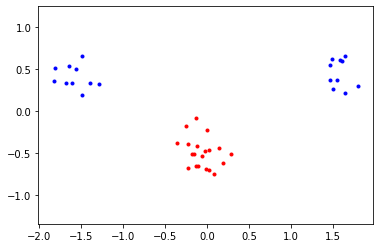

In [253]:
plt.plot([p[0] for p in class_a], [p[1] for p in class_a], 'b.')
plt.plot([p[0] for p in class_b], [p[1] for p in class_b], 'r.')
plt.axis('equal')

In [254]:
res = calc(k_linear, inputs, targets)
res

     fun: -0.25529525496151795
     jac: array([ 5.15074551,  1.10743833,  0.78344734,  4.87772837,  1.20496622,
        5.55239572,  1.92377815,  3.58362719,  3.33526668,  3.83689007,
        3.24604702,  3.47093213,  6.02452697,  2.64589962,  1.16477475,
        2.72663143,  3.98696727,  5.07841188,  1.26520547,  2.94033723,
        5.38275577,  2.7219056 ,  4.62753943, -0.14691785,  2.3107678 ,
        2.95326379,  3.24796581,  5.47764319,  5.93172431,  3.00554736,
       -0.1083774 ,  2.81733146,  5.3752442 ,  3.87024212,  1.10970128,
        2.59586726,  5.45545897,  1.03706878,  5.50175998,  4.17425829])
 message: 'Optimization terminated successfully.'
    nfev: 168
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 1.09164846e-14, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.000

In [255]:
a = res['x']
indices = np.where(a > 10**-5)

In [256]:
inputs[indices][0]

array([-1.4901659 ,  0.18750334])

In [262]:
b = (a[indices] * targets[indices] * [k_linear(inputs[indices][0], inputs[i]) for i in indices] - targets[indices][0]).sum()
b

0.06586199713366891

In [266]:
def indicator(x, y):
    return (a[indices] * targets[indices] * [k_linear(np.array(x, y), p) for p in inputs[indices]] - b).sum()

In [267]:
xgrid=np.linspace(-5, 5)
ygrid=np.linspace(-4, 4)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
grid

array([[ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895],
       [ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895],
       [ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895],
       ...,
       [ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895],
       [ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895],
       [ 8.37865298,  8.02591416,  7.67317535, ..., -8.20007132,
        -8.55281014, -8.90554895]])

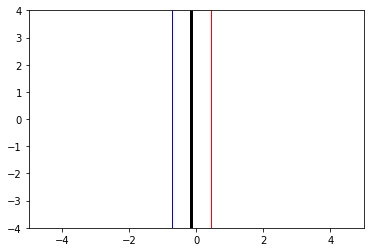

In [269]:
plt.contour(xgrid, ygrid, grid, (-1, 0, 1), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))